In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csv_path = 'data/Manaus.csv'
df = pd.read_csv(csv_path,encoding='iso-8859-1',sep=';')

/home/yonekura/anaconda3/envs/paic/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12,15,22,24,30,31,32,33,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df[df._classificacao.eq('Confirmado')]
print("Casos confirmados antes do Filtro: ", len(df.index)) # confirmados antes do filtro

filterList = ['_comorb', 'sintoma(s)*','_etnia','_profiss_saude','^(_dt_(\w){1,10})$','_origem', '_raca', '_criterio','_srag','_evolução','_tipo_teste']
for i in range(len(filterList)):
    df = df[df.columns.drop(list(df.filter(regex=filterList[i])))]
    
df_sem_conclusao = df[df.columns.drop('_conclusao')].copy()
df.dropna(inplace=True)
#df_sem_conclusao.dropna(inplace=True)
print("Casos confirmados depois do Filtro: ", len(df.index)) # confirmados antes do filtro

Casos confirmados antes do Filtro:  36947
Casos confirmados depois do Filtro:  12672


In [4]:
bairros = df['_bairro_mapa'].value_counts()[:10]
bairros.loc['OUTROS'] =  df['_bairro_mapa'].value_counts()[10:].sum()
bairros = pd.DataFrame({'bairro':bairros.index, 'casos':bairros.values})
print(bairros)

                   bairro  casos
0             CIDADE NOVA    859
1                COMPENSA    520
2                ALVORADA    514
3                  FLORES    480
4       SÃO JOSÉ OPERÁRIO    479
5   PARQUE 10 DE NOVEMBRO    451
6          JORGE TEIXEIRA    448
7             NOVO ALEIXO    445
8                  CENTRO    412
9              PETRÓPOLIS    405
10                 OUTROS   7659


Text(0, 0.5, 'Número de casos')

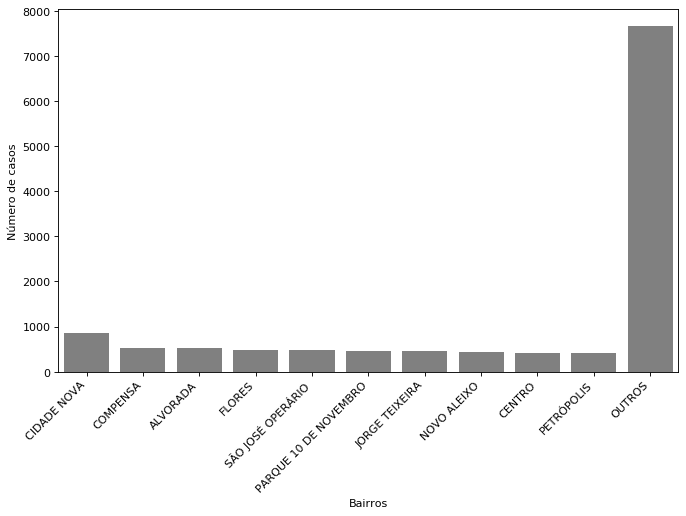

In [5]:
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.barplot(x='bairro',y='casos',data=bairros,color='grey')
plt.xticks(rotation=45,ha='right')
ax.set_xlabel('Bairros')
ax.set_ylabel('Número de casos')

Text(0, 0.5, 'Idade')

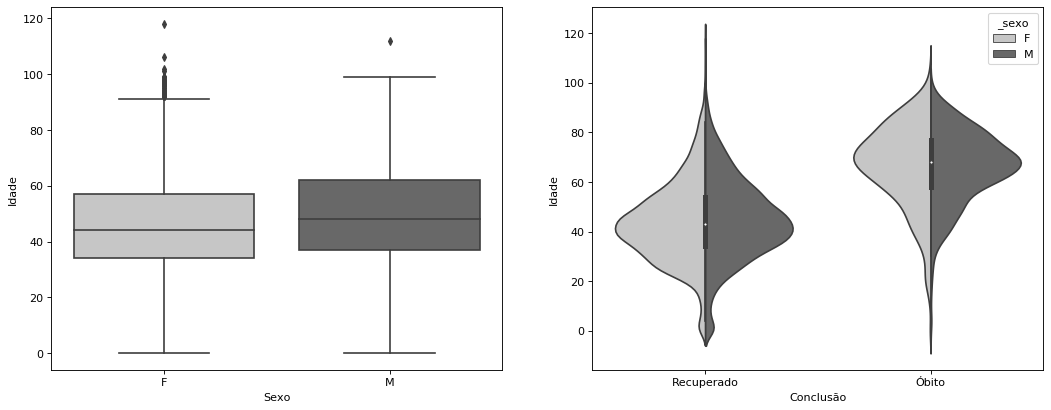

In [6]:
fig=plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
ax = sns.boxplot(x='_sexo', y='_idade',data=df,palette='Greys')
ax.set_xlabel('Sexo')
ax.set_ylabel('Idade')
plt.subplot(1,2,2)
ax = sns.violinplot(x='_conclusao', y='_idade',hue='_sexo',data=df,palette='Greys',split=True)
ax.set_xlabel('Conclusão')
ax.set_ylabel('Idade')

[Text(0, 0, '2020-07-27'),
 Text(0, 0, '2020-07-28'),
 Text(0, 0, '2020-07-29'),
 Text(0, 0, '2020-07-30'),
 Text(0, 0, '2020-07-31'),
 Text(0, 0, '2020-08-01'),
 Text(0, 0, '2020-08-02'),
 Text(0, 0, '2020-08-03'),
 Text(0, 0, '2020-08-04'),
 Text(0, 0, '2020-08-05')]

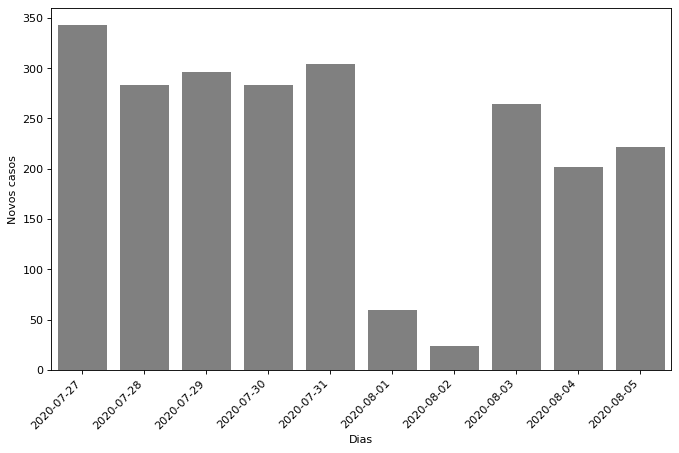

In [7]:
df_sem_conclusao['_dt_notificacao'] = pd.to_datetime(df_sem_conclusao['_dt_notificacao'],format='%d/%m/%Y')
n_dias = 10
casos_recentes = df_sem_conclusao['_dt_notificacao']  > df_sem_conclusao["_dt_notificacao"].max() - pd.Timedelta(days=n_dias)
casos = []
dti = pd.date_range(df_sem_conclusao["_dt_notificacao"].max() - pd.Timedelta(days=n_dias), periods=n_dias, freq='D')
for i in dti:
    aux = df_sem_conclusao['_dt_notificacao'] == i
    casos.append(len(df_sem_conclusao[aux]))
    
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.barplot(x=dti,y=casos,color='grey')
plt.xticks(rotation=45,ha='right')
ax.set_xlabel('Dias')
ax.set_ylabel('Novos casos')
dates = dti.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=dates, rotation=45, ha='right')

Text(0, 0.5, 'Número de casos')

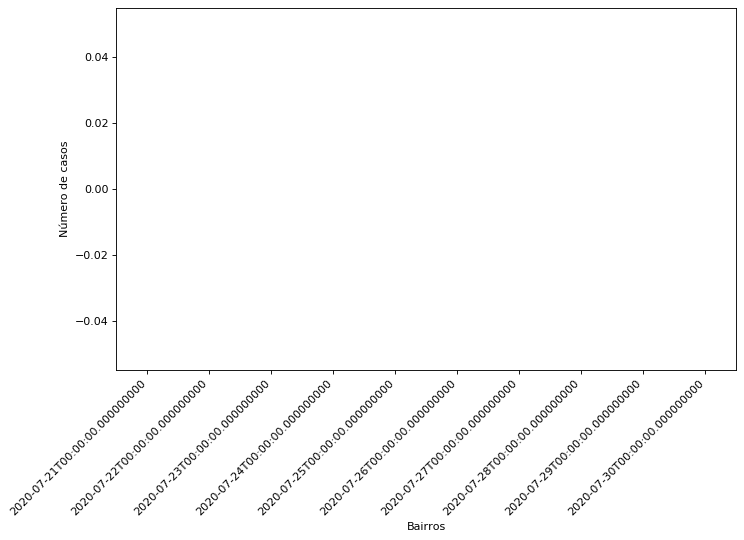

In [8]:
df['_dt_notificacao'] = pd.to_datetime(df['_dt_notificacao'],format='%d/%m/%Y')
n_dias = 10
casos_recentes = df['_dt_notificacao']  > df["_dt_notificacao"].max() - pd.Timedelta(days=n_dias)
casos = []
dti = pd.date_range(df["_dt_notificacao"].max() - pd.Timedelta(days=n_dias), periods=n_dias, freq='D')
for i in dti:
    aux = df[df._conclusao.eq('Recuperado') & (df['_dt_notificacao']==i)]
    casos.append(len(aux))
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.barplot(x=dti,y=casos,color='grey')
plt.xticks(rotation=45,ha='right')
ax.set_xlabel('Bairros')
ax.set_ylabel('Número de casos')
#dates = dti.strftime('%Y-%m-%d').sort_values().unique()
#ax.set_xticklabels(labels=dates, rotation=45, ha='right')

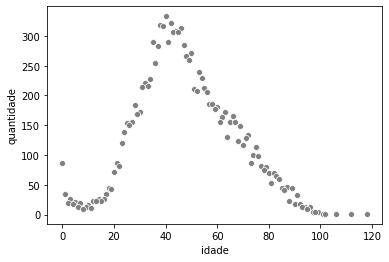

In [14]:
groupedByAge = df.loc[:]
groupedByAge = groupedByAge['_idade'].value_counts().reset_index()
groupedByAge.columns = ['idade', 'quantidade']
groupedByAge
sns.scatterplot(x='idade', y='quantidade',data=groupedByAge,color='grey')

          date  count
150 2020-01-30      1
144 2020-02-16      2
145 2020-02-23      1
149 2020-03-06      1
151 2020-03-09      1
..         ...    ...
135 2020-08-02     24
65  2020-08-03    264
82  2020-08-04    202
75  2020-08-05    222
139 2020-08-06      9

[153 rows x 2 columns]


Text(0, 0.5, 'Número de casos')

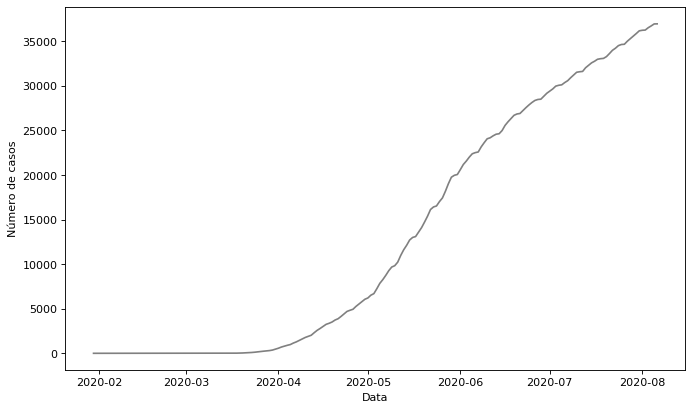

In [10]:
df_sem_conclusao['_dt_notificacao'] = pd.to_datetime(df_sem_conclusao['_dt_notificacao'],format='%d/%m/%Y')
casos_por_dia = df_sem_conclusao['_dt_notificacao'].value_counts().reset_index().sort_values('index')
casos_por_dia.columns = ['date', 'count']
print(casos_por_dia)
casos_cumulativos = casos_por_dia.copy()
casos_cumulativos['count'] = np.cumsum(casos_cumulativos['count']) 
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.lineplot(x='date',y='count',data=casos_cumulativos,color='grey')
#plt.xticks(rotation=45,ha='right')
ax.set_xlabel('Data')
ax.set_ylabel('Número de casos')

[ 259  268 1309 2512 2990 2122 1552 1015  514  126    3    2]


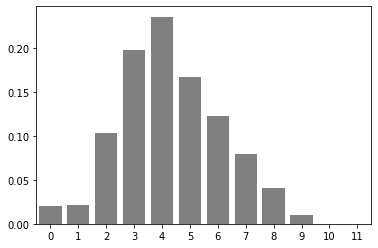

In [11]:
bins = np.zeros((12),dtype=np.int32)
for i in groupedByAge.iterrows():
    index = int(i[1][0]//10)
    bins[index] += i[1][1]
sns.barplot(np.arange(12),bins/np.sum(bins),color='grey')
print(bins)